##All imports here

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder , MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

##File handling

In [5]:
import pandas as pd
file_link = 'https://drive.google.com/file/d/1BiYCkiIUS8NOmBaPYXilJISnWW7OnTrf/view?usp=sharing'
file_id = file_link.split('/')[-2]
new = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv('property_bd.csv')
df.head()

/var/folders/70/0rb261jx301_1zt04645z6b00000gn/T/ipykernel_40095/3105870831.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('property_bd.csv')


,area,building_type,building_nature,image_url,num_bath_rooms,num_bed_rooms,price,property_description,property_overview,property_url,...,id,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,service_staff_amenity_count,unclassify_amenity_count,division,zone
0,1185.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,0.0,3.0,6100000.0,Grab This 1185 Sq Ft Beautiful Flat Is Vacant ...,This flat consists of facilities you can think...,https://www.bproperty.com/en/property/details-...,...,bproperty-0,0,1,2,0,2,0,3,Dhaka,Khilgaon
1,2464.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,4.0,3.0,28900000.0,A Vibrant 2464 Sq Ft Residential Flat For Sale...,Ready to move in somewhere with everything nea...,https://www.bproperty.com/en/property/details-...,...,bproperty-1,0,2,0,0,3,0,4,Dhaka,Dhanmondi
2,1140.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,0.0,3.0,7500000.0,1140 Sq Ft Nicely Planned Apartment Is Availab...,A spacious 1140 Square Feet apartment in Mirp...,https://www.bproperty.com/en/property/details-...,...,bproperty-2,0,2,2,0,2,0,4,Dhaka,Mirpur
3,1920.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,3.0,3.0,20000000.0,A Modern Well-planned Apartment Of 1920 Sq Ft ...,Looking for the perfect home that offers a lux...,https://www.bproperty.com/en/property/details-...,...,bproperty-3,0,1,2,0,3,0,3,Dhaka,Bashundhara R/A
4,1445.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,3.0,3.0,10800000.0,"1445 Sq Ft Ready Flat For Sale In Banasree, Wi...",Choosing a new home can be an overwhelming exp...,https://www.bproperty.com/en/property/details-...,...,bproperty-4,0,0,2,0,1,0,4,Dhaka,Khilgaon


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33701 entries, 0 to 33700
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   33701 non-null  float64
 1   building_type                          33701 non-null  object 
 2   building_nature                        33701 non-null  object 
 3   image_url                              17265 non-null  object 
 4   num_bath_rooms                         33701 non-null  float64
 5   num_bed_rooms                          33701 non-null  float64
 6   price                                  33701 non-null  float64
 7   property_description                   19029 non-null  object 
 8   property_overview                      18509 non-null  object 
 9   property_url                           33679 non-null  object 
 10  purpose                                33701 non-null  object 
 11  ci

##Pre-Processing

###Dropped unnecessary features

In [7]:
df = df.drop(['image_url','property_description','property_overview','property_url','id','division','zone','address'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33701 entries, 0 to 33700
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   33701 non-null  float64
 1   building_type                          33701 non-null  object 
 2   building_nature                        33701 non-null  object 
 3   num_bath_rooms                         33701 non-null  float64
 4   num_bed_rooms                          33701 non-null  float64
 5   price                                  33701 non-null  float64
 6   purpose                                33701 non-null  object 
 7   city                                   33701 non-null  object 
 8   locality                               33701 non-null  object 
 9   relaxation_amenity_count               33701 non-null  int64  
 10  security_amenity_count                 33701 non-null  int64  
 11  ma

In [8]:
df.isnull().sum()

area                                     0
building_type                            0
building_nature                          0
num_bath_rooms                           0
num_bed_rooms                            0
price                                    0
purpose                                  0
city                                     0
locality                                 0
relaxation_amenity_count                 0
security_amenity_count                   0
maintenance_or_cleaning_amenity_count    0
social_amenity_count                     0
expendable_amenity_count                 0
service_staff_amenity_count              0
unclassify_amenity_count                 0
dtype: int64

###Fitered data of Dhaka

In [9]:
df = df[
        (df["num_bed_rooms"] > 0) &
        (df["num_bath_rooms"] > 0) &
        (df["price"].between(10000, 4e7))
    ]
dhaka = df[df['city']=='Dhaka']
features = dhaka.drop(['price'], axis=1)
target = dhaka['price']

df

,area,building_type,building_nature,num_bath_rooms,num_bed_rooms,price,purpose,city,locality,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,service_staff_amenity_count,unclassify_amenity_count
1,2464.0,Apartment,Residential,4.0,3.0,28900000.0,Sale,Dhaka,Dhanmondi,0,2,0,0,3,0,4
3,1920.0,Apartment,Residential,3.0,3.0,20000000.0,Sale,Dhaka,Bashundhara R-A,0,1,2,0,3,0,3
4,1445.0,Apartment,Residential,3.0,3.0,10800000.0,Sale,Dhaka,Banasree,0,0,2,0,1,0,4
6,2468.0,Apartment,Residential,3.0,3.0,36500000.0,Sale,Dhaka,Banani,0,2,2,0,4,0,4
7,1475.0,Apartment,Residential,3.0,3.0,10500000.0,Sale,Dhaka,Uttara,0,2,3,0,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33681,800.0,Apartment,Residential,2.0,2.0,4800000.0,Rent,Dhaka,Bashundhara R.A,0,1,0,0,1,0,1
33682,0.0,Office,Commercial,1.0,3.0,1500000.0,Rent,Dhaka,Tejgaon,0,0,0,0,0,0,0
33683,0.0,Apartment,Residential,1.0,1.0,1000000.0,Rent,Dhaka,Bashundhara R.A,0,1,0,0,1,0,1
33684,1600.0,Office,Commercial,3.0,3.0,2850000.0,Rent,Dhaka,Adabor,0,0,0,0,0,0,1


###Splitting Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
#seperating categorical and numerical cols
cat_cols=features.select_dtypes(include=['object']).columns.tolist()
num_cols = features.select_dtypes(include=np.number).columns.tolist()
print(cat_cols)
print(num_cols)

['building_type', 'building_nature', 'purpose', 'city', 'locality']
['area', 'num_bath_rooms', 'num_bed_rooms', 'relaxation_amenity_count', 'security_amenity_count', 'maintenance_or_cleaning_amenity_count', 'social_amenity_count', 'expendable_amenity_count', 'service_staff_amenity_count', 'unclassify_amenity_count']


###Scaling and Encoding

In [11]:
scaler = MinMaxScaler()
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ])

###Co-relation Matrix

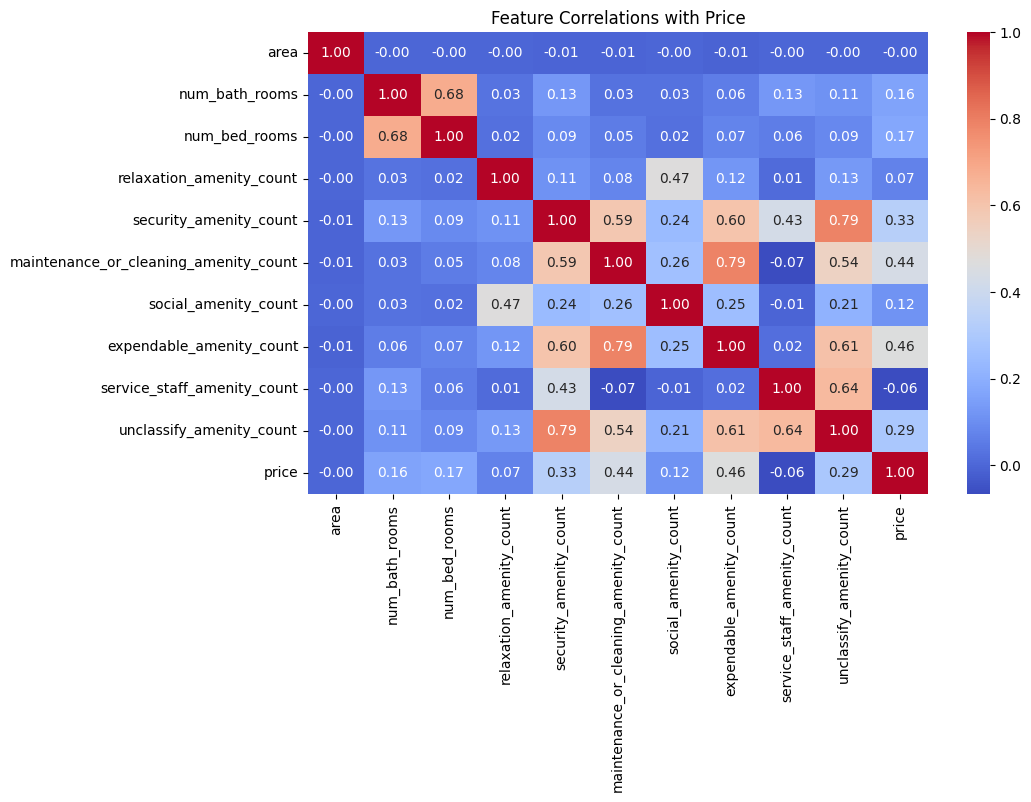

In [12]:
corr_matrix = df[num_cols + ["price"]].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations with Price")
plt.show()

##Models

###Linear Regression

In [13]:
linearRegression = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", LinearRegression())
    ]
)
linearRegression.fit(X_train, y_train)

y_pred = linearRegression.predict(X_test)

lr_mae = mean_absolute_error(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred)
lr_r2_score = r2_score(y_test, y_pred)

print(f"MAE  : {lr_mae:.2f}")
# print(f"RMSE : {rmse:.2f}")
print(f"R²   : {lr_r2_score:.3f}")

MAE  : 1646290.85
R²   : 0.678


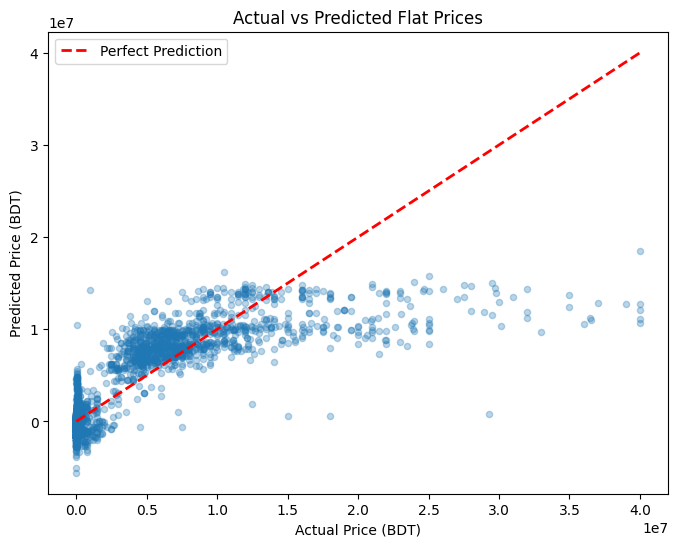

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3, s=20)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label="Perfect Prediction")

plt.xlabel("Actual Price (BDT)")
plt.ylabel("Predicted Price (BDT)")
plt.title("Actual vs Predicted Flat Prices")
plt.legend()
plt.show()

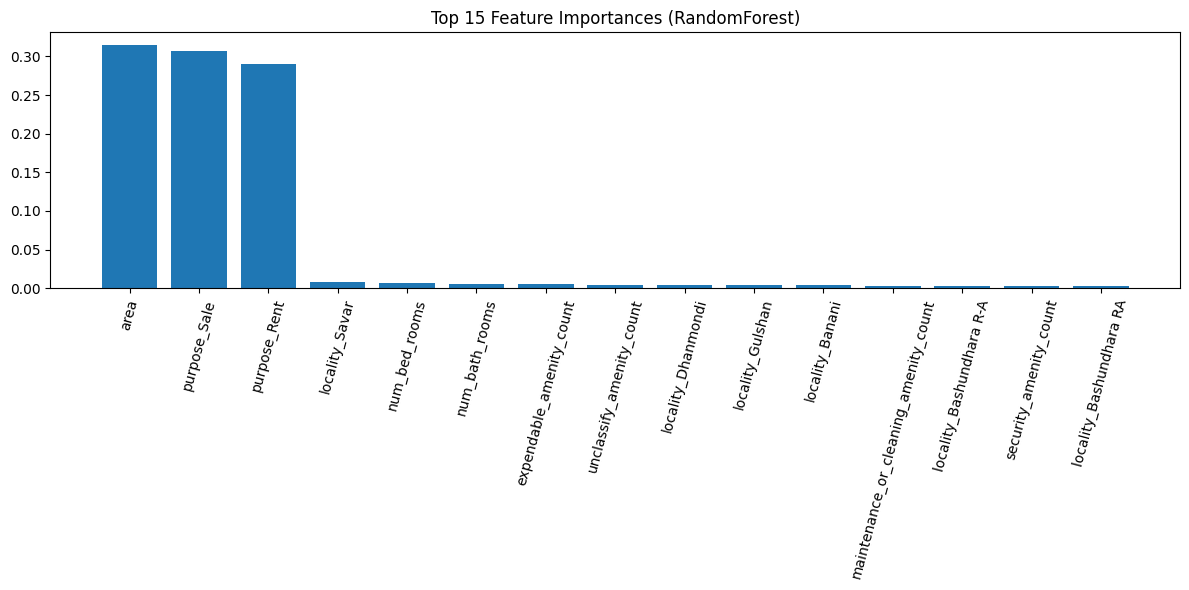

In [15]:
# After fitting model with RandomForest
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=200, random_state=42))
])
rf_model.fit(X_train, y_train)

# Get feature names after preprocessing
feature_names = (num_cols +
                 list(preprocessor.transformers_[1][1] # OneHotEncoder
                      .get_feature_names_out(cat_cols)))


importances = rf_model.named_steps["regressor"].feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.bar(range(15), importances[indices][:15], align="center")
plt.xticks(range(15), [feature_names[i] for i in indices[:15]], rotation=75)
plt.title("Top 15 Feature Importances (RandomForest)")
plt.tight_layout()
plt.show()

###Random Forest Regression

In [16]:
rf_regressor = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(random_state=42))
    ]
)

param_grid = {
    "regressor__n_estimators": [100, 300, 500],
    "regressor__max_depth": [5, 10, 15],
    "regressor__min_samples_split": [2, 5, 10]
}

randomForest = GridSearchCV(
    rf_regressor,
    param_grid,
    cv=3,
    scoring="r2",
    n_jobs=4)
randomForest.fit(X_train, y_train)
y_pred = randomForest.predict(X_test)

rf_r2_score = r2_score(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
print("Best params:", randomForest.best_params_)
print("Best CV R²:", randomForest.best_score_)

Best params: {'regressor__max_depth': 15, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 300}
Best CV R²: 0.917950470636821


###XGBR

In [19]:
xgb =Pipeline(
    steps = [
        ("preprocessor",preprocessor),
        ("regressor",XGBRegressor(n_estimators=1000, learning_rate=0.07, n_jobs=5))
])
xgb.fit(X_train, y_train,)

y_pred = xgb.predict(X_test)
xgb_r2_score = r2_score(y_test, y_pred)
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_mae = mean_absolute_error(y_test, y_pred)
score = cross_val_score(xgb, features, target, cv=5, scoring="r2")
print(f"R²   : {xgb_r2_score:.3f}")
# print(f"MSE  : {mse:.2f}")
# print(f"CV R² (mean):", score.mean())
# print(f"CV R²:", score)

R²   : 0.930


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

# Create a pipeline that includes the preprocessor and the XGBRegressor
cv_pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=1000, learning_rate=0.07, n_jobs=5))
])

# Perform cross-validation on the original data using the pipeline
scores = cross_val_score(cv_pipeline_xgb, features, target, cv=5, scoring="r2")
print("CV R²:", scores.mean())

###Light GBM

In [18]:
import lightgbm as lgbm

lgbm_regressor = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", lgbm.LGBMRegressor(random_state=42))
    ]
)
lgbm_regressor.fit(X_train, y_train)
y_pred = lgbm_regressor.predict(X_test)
lgbm_r2_score = r2_score(y_test, y_pred)
lgbm_mse = mean_squared_error(y_test, y_pred)
lgbm_mae = mean_absolute_error(y_test, y_pred)
score = cross_val_score(xgb, features, target, cv=5, scoring="r2")
print(f"R²   : {lgbm_r2_score:.3f}")
# print(f"MSE  : {mse:.2f}")
# print(f"CV R² (mean):", score.mean())
# print(f"CV R²:", score)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 463
[LightGBM] [Info] Number of data points in the train set: 13784, number of used features: 78
[LightGBM] [Info] Start training from score 2994282.646111


/Volumes/Projects/mL/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


R²   : 0.917


##Performance Comparison

###R2 Score 

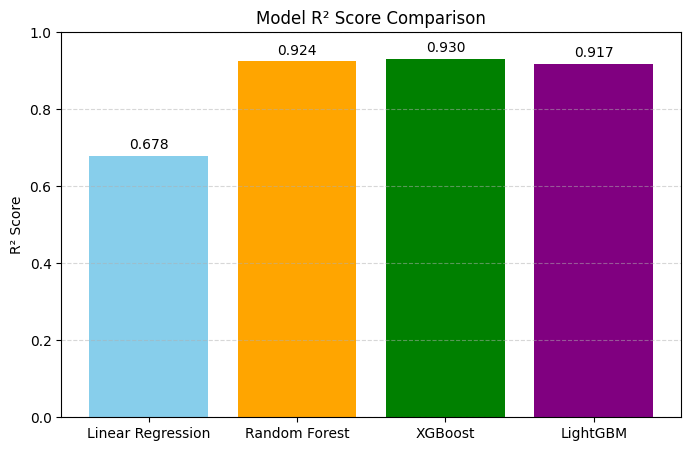

In [20]:


# Collect R² scores (make sure these variables are defined in your notebook)
model_names = ["Linear Regression", "Random Forest", "XGBoost", "LightGBM"]
r2_scores = [
    lr_r2_score,      # Linear Regression
    rf_r2_score,      # Random Forest
    xgb_r2_score,     # XGBoost
    lgbm_r2_score     # LightGBM
]

plt.figure(figsize=(8,5))
bars = plt.bar(model_names, r2_scores, color=["skyblue", "orange", "green", "purple"])
plt.ylabel("R² Score")
plt.title("Model R² Score Comparison")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Annotate bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{bar.get_height():.3f}", ha="center", va="bottom", fontsize=10)

plt.show()

###MAE Score

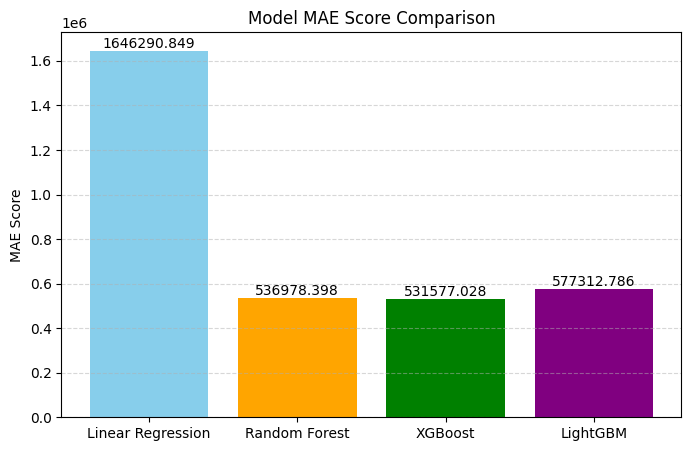

In [24]:
# ...existing code...
plt.figure(figsize=(8,5))
bars = plt.bar(model_names, mae, color=["skyblue", "orange", "green", "purple"])
plt.ylabel("MAE Score")
plt.title("Model MAE Score Comparison")
# Remove or adjust this line:
# plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Annotate bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{bar.get_height():.3f}", ha="center", va="bottom", fontsize=10)

plt.show()